In [1]:
#【YoLov3に挑戦】
#yolov3をanaconda navigatorからjupyter開いて使う
#YoLov3 kerasモデルを作成し保存する
#github https://github.com/experiencor/keras-yolo3
#darknetではなくexperiencorのkeras-yolo3
#yolo3_one_file_to_detect_them_all.py

#!git clone https://github.com/experiencor/keras-yolo3 keras-yolo3

In [2]:
#from .keras_yolo3_master import yolo3_one_file_to_detect_them_all
#>>>ImportError: attempted relative import with no known parent package

In [3]:
#from .keras_yolo3_master.yolo3_one_file_to_detect_them_all import load_image_pixels
#>>>ImportError: attempted relative import with no known parent package

In [4]:
#from . import yolo3_one_file_to_detect_them_all
#>>>ImportError: attempted relative import with no known parent package

In [5]:
#from .keras_yolo3_master import *

In [6]:
# import cv2
# from keras_yolo3_master import yolo3_one_file_to_detect_them_all
# #>>>AttributeError: module 'tensorflow' has no attribute 'compat'
# #>>>動いた。「.」はカレントディレの場合は自動で探すから不要。


# #>>>ValueError: threshold must be non-NAN, try sys.maxsize for untruncated representation

In [7]:
import struct
import numpy as np
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model

Using TensorFlow backend.
C:\Users\yosuk\anaconda3\envs\yolov3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yosuk\anaconda3\envs\yolov3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yosuk\anaconda3\envs\yolov3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yosuk\anaconda3\envs\yolov3\lib\sit

In [8]:
#ValueError: threshold must be non-NAN出るからimoprt sysしてyolo3_one_file_to_detect.pyのthreshold=のとこを変える
#np.set_printoptions(threshold=np.nan)をnp.set_printoptions(threshold=sys.maxsize)に。
import sys
import cv2
from keras_yolo3_master import yolo3_one_file_to_detect_them_all as yl
#>>>動いた。「.」はカレントディレの場合は自動で探すから不要。
#>>>AttributeError: module 'tensorflow' has no attribute 'compat'

In [9]:
#!conda list

In [10]:
!conda info -e

# conda environments:
#
base                     C:\Users\yosuk\anaconda3
tensorflow               C:\Users\yosuk\anaconda3\envs\tensorflow
tf110cpu                 C:\Users\yosuk\anaconda3\envs\tf110cpu
tf140                    C:\Users\yosuk\anaconda3\envs\tf140
yolov3                *  C:\Users\yosuk\anaconda3\envs\yolov3



In [11]:
#!activate yolov3

In [12]:
import struct
import numpy as np
from tensorflow import keras
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model

In [13]:
#!conda update tensorflow

In [14]:
# モデル作成
model = yl.make_yolov3_model()
# DarkNet形式のモデルの重みをWeightReaderクラスから読み込む
#WeightReader()引数はファイルゆえパスを入力。.weightsという拡張子の重みファイル
weight_reader = yl.WeightReader('./keras_yolo3_master/yolov3.weights')
# WeightReaderインスタンスのメソッドload_weihts()関数で、定義したkerasモデルを渡して重みをlayerに設定
weight_reader.load_weights(model)
# 保存。model.h5はkerasモデル形式で使用可能
#model.save('model.h5')








loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolut

この画像を使って物体認識する
img src='animals.jpg'
<img src='animals.jpg'>

In [15]:
#必要ライブラリ
from numpy import expand_dims
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

#最初にkerasモデルをロードする
model = load_model('model.h5')

#想定さえる416＊416ピクセルで画像を読み込む
image = load_img('animals.jpg', target_size=(416,416))

#PILイメージオブジェクトの画像をnumpy arrayに変換
image = img_to_array(image)

#画像のピクセルデータを正規化
image = image.astype('float32')
image /= 255.0


C:\Users\yosuk\anaconda3\envs\yolov3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


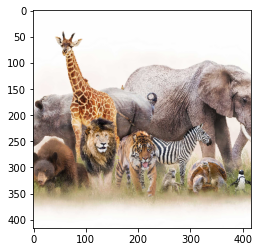

In [16]:
#ndarrayに変換し正規化したimageを画像として確認したい

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
plt.imshow(image)


# from PIL import Image
# pil_img = Image.fromarray(image)
# print(pil_img.mode)
#>>>TypeError: Cannot handle this data type: (1, 1, 3), <f4

In [17]:
#後で、検出されたオブジェクトの境界ボックスを正方形から元の形状に拡大縮小する。
#そして元画像を再度表示する必要があるため、元の画像の情報を保存

#元のimageのサイズを取得
image = load_img('animals.jpg')
width, height = image.size
image.size

(1800, 1680)

In [18]:
#これまでのコードを一連の関数にする。
#ファイル名とtargetサイズを取得し、kerasモデルへ入力できる正規化されたピクセルデータと、画像の元の幅と高さを返す。

def load_image_pixels(filename, shape):
    #元の画像の幅と高さを取得
    image = load_img(filename)
    width, height = image.size
    #入力するため必要なtarget sizeで画像を読み込む
    image = load_img(filename, target_size=shape)
    #ndarrayに変換
    image = img_to_array(image)
    #正規化
    image = image.astype('float32')
    image /= 255.0
    #size:(width, height)と、1つ次元を加える
    #カラー画像の配列（形状: (高さ, 幅, 色)）と単色画像（形状: (幅、高さ)）の配列を同じ位置同士で足したり引いたりしたい。
    #その際、そのままだとブロードキャストできずにエラーとなる。
    #しかし、単色画像の最後に新たな次元を追加するとうまくいくため、次元を加える。
    image = expand_dims(image, 0)
    return image, width, height

In [19]:
#モデルに必要な入力サイズを定義する
input_w, input_h = 416,416
#新たに画像を定義
photo_filename = 'animals.jpg'
#画像photo_filenameから定義した関数load_image_pixelsで
#ndarray化+正規化したimage, size:(input_width, input_height)を取得
image, image_w, image_h = load_image_pixels(photo_filename, (input_w,input_h))

In [20]:
#imageをmodelで予測する。　yhatは予測値の意味
yhat = model.predict(image)
#yhatはnumpy配列のリスト型で、1行1行ループにかけ、それら全体の列数のshapeを表示
#多分、input時の画像size(ピクセル番号,416,416,3,255)
#つまり（ピクセル番号,縦サイズ,横サイズ,RGB,正規化項）…違うか。多分列数
#13,26,52は畳み込みの時のlayer層3つのsizeで最後は13まで小さくなって出力される
#そして255は3つの層で出力されるimage画像の全ピクセル(縦横前行)をすべてにそれぞれ255かけると元の画像の大きさになるてことか?
#コレ。3つのNumpy配列のリストが返されてその形状が出力として表示されている
#これらの配列は境界ボックスとクラスラベルの両方を予測するが、エンコードされる。
print([a.shape for a in yhat])

[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


In [21]:
print(yhat)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
#print(yhat.shape)
#>>>AttributeError: 'list' object has no attribute 'shape'

In [24]:
print(len(yhat))

3


In [28]:
#モデルで予測をして結果を解釈する
#モデルの出力は3つ？の異なるグリッドサイズ(セルの集合)からエンコードされた境界ボックス。
#ボックスはmscocoの分析に基づいたアンカーボックスの条件・環境で定義

#anchors(画像の特定位置)を定義　yolo3_one~all.pyファイルの中でanchorsが定義されているためコピペ
#mscocoでtrain時にこのanchorsが平均的なオブジェクトのサイズらしいから
#最初にまずここをanchorsと置き、vgg16転移みたくより精度高くオブジェクト検知
anchors = [[116,90,156,198,373,326], [30,61,62,45,59,119], [10,13,16,30,33,23]]

#thresholdつまり閾値(おそらく境界ボックスが物体か背景の確立を表す信頼度スコアの閾値)
nms_thresh = 0.45
class_threshold = 0.6
boxes = list()

#Boundboxインスタンス化を予測した物体の数(今回は3)だけ繰り返す
for i in range(len(yhat)):
    #decode_netout()関数は一個ずつNumpy配列を取得して境界ボックスとクラス予測をデコードし、
    #加えて閾値未満の境界ボックスは無視する。
    #出力は入力画像の形状(input_shape)とクラスの確率で各境界ボックスの角を定義するBoundBoxインスタンスのリストを返す
    #その際クラスの確率は、classesという変数に入りこれの最後の要素がクラス分類の確率
    #classes = netout[int(row)][col][b][5:]でnetoutとはdecode_netout()関数の引数yhat
    boxes += yl.decode_netout(yhat[i][0], anchors[i], class_threshold, nms_thresh, input_h, input_w)

In [30]:
#後で元の画像をプロットして境界ボックスを描画し実際のオブジェクトを検出するため
#境界ボックスを元の画像の形状に引き伸ばす

#correct_yolo_boxes()関数で境界ボックスのリスト、読み込み画像の元の形状、netへの入力形状
#を引数として取得して、候補となる境界ボックスのサイズを元画像のサイズに変換
yl.correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)

In [32]:
#do_nms()関数
#境界ボックスの候補は一つの物体に対してかなりの量があり、それらは重なり合ってる
#重なってるボックスのリストをフィルタリングして重複がないようにマージする
#そのために重なり合う重複量をパラメーターで定義し、そのパラを閾値(IoU)で指定
#このフィルタリングを非最大抑制non_maximam_supression(nms)という
#do_nms()は、境界ボックスリストと閾値を渡し、重複したボックスをマージし上書き
#マージされたら各候補ボックスの予測確率は不要になるので削除されるが、それぞれのボックス
#の位置やサイズの情報は残るため、別のオブジェクトを検出可能

yl.do_nms(boxes, nms_thresh)

In [33]:
#一つのボックスに複数の物体を強く予測したら困るから、各ボックスはクラスラベルごとに予測をする
#def_boxes()関数でボックスのリスト、既知ラベル、分類の閾値を引数に渡し
#ボックス、ラベル、スコアの並列リストを返す関数を新たに定義

def get_boxes(boxes, labels, thresh):
    v_boxes, v_labels, v_scores = list(), list(), list()
    #全ボックスを列挙
    for box in boxes:
        #分類されうる全てのラベルを列挙
        for i in range(len(labels)):
            #一個一個のラベル分類の閾値が十分高いかを確認
            if box.classes[i] > thresh:
                v_boxes.append(box)
                v_labels.append(labels[i])
                v_scores.append(box.classes[i] * 100)
    #全てのlabelsは一つのボックスに対するトリガーゆえ削除しない            
    return v_boxes, v_labels, v_scores

In [34]:
#モデルに認識される既知ラベルを定義(スクリプトに定義されている)　コピペ
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
    "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
    "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
    "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
    "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
    "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
    "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
    "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
    "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
    "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

#検出された物体のそれぞれの情報を取得
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)

In [39]:
#【関数に追加】

# #強く予測されたオブジェクトのボックスが複数あるのでそれらは要約し、ラベルとスコア表示
# for i in range(len(v_boxes)):
#     print(v_labels[i], v_scores[i])


# #一個一個物体があると予測したマージボックスを取得
# box = v_boxes[i]
# #それの位置を取得
# y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
# #ボックスの幅と高さを計算
# width, height = x2-x1, y2-y1
# #検出オブジェクトのマージ後の境界ボックスの描画情報(その形状shape)を作成
# #Rectangleはmatplotlib.patchesモジュでpatchesに長方形を描画する設定を加える関数
# from matplotlib.patches import Rectangle
# rect = Rectangle((x1, y1), width, height, fill=False, color='white')
# #元画像をプロットし検出された各オブジェクトの周囲に境界ボックスを描く
# #上でpatch設定したボックスの描画rectを、matplotlib.patchモジュのadd_patchで追加
# from matplotlib import pyplot
# ax.add_patch(rect)

giraffe 75.81214904785156
elephant 91.41889810562134
zebra 98.83480072021484
bear 96.75655961036682
zebra 68.28576326370239


NameError: name 'ax' is not defined

In [45]:
#draw_boxes()関数を作成
#元の画像のファイル名と各境界ボックス、各ラベル、各スコアの並列リストを引数に渡す
#検出された全てのオブジェクトを示すプロットを作成
def draw_boxes(filename, v_boxes, v_labels, v_scores):
    #画像を読み込む
    data = pyplot.imread(filename)
    #画像をプロット
    pyplot.imshow(data)
    #ボックスを描画するためのコンテキストを取得 get current axesで現在のaxesを取得
    ax = pyplot.gca()
    #それぞれのボックスをプロット
    for i in range(len(v_boxes)):
        box = v_boxes[i]
        #座標を取得
        y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
        #座標をもとに各ボックスの幅と高さを取得
        width, height = x2 - x1, y2 - y1
        #形を作る color='white'みやすいかも
        rect = Rectangle((x1, y1), width, height, fill=False, color='black')
        #ボックスを描く
        ax.add_patch(rect)
        #ボックスに信頼度スコアとラベルをテキスト表示　color='white'みやすいかも
        label = '%s (%.3f)'%(v_labels[i], v_scores[i])
        pyplot.text(x1, y1, label, color='black')
    #プロット表示
    pyplot.show()

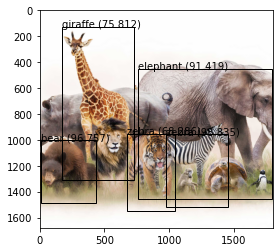

In [46]:
#draw_boxes()で画像表示
draw_boxes(photo_filename, v_boxes, v_labels, v_scores)

In [47]:
#オブジェクト(ラベル)と信頼度スコアをまとめて表示
for i in range(len(v_boxes)):
    print(v_labels[i], v_scores[i])

giraffe 75.81214904785156
elephant 91.41889810562134
zebra 98.83480072021484
bear 96.75655961036682
zebra 68.28576326370239
